<a href="https://colab.research.google.com/github/caojie1024/BlockChain/blob/master/fun_with_optimizer_and_more_fun_with_image_reconstruction_for_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun With Optimizer & More Fun With Image Rconstruction

### Ray 2019.03.05

Not until the recent years I realize how powerful the optimizer can be. 

The easiness of gradient calculation, the speed of the backpropagation really makes an universal "truth approximater", no matter how noised this path might be.

I hope this understanding brings clarification, inspiration and intuitive understanding of such machanism, and how easy it is to be executed on coding

In [0]:
from torchvision import transforms

In [0]:
import numpy as np
import torch
from torch import nn

Upload the image file, run the following cell block, and hit buton "Choose Files", choose a pic about 2:3, 3 in width, any pic, preferably not cartoon.

You don't have to understand the following piece of code,  it's just how you upload a photo to colab notebook

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

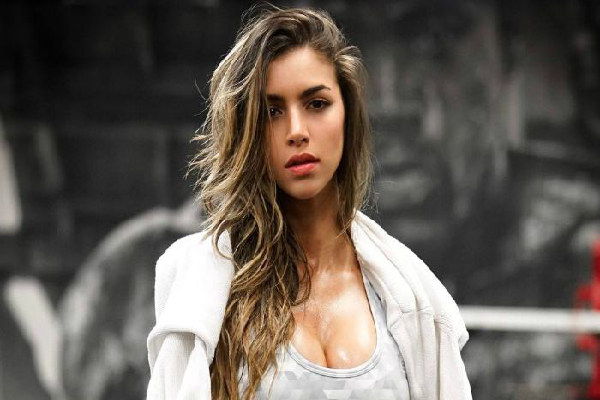

In [0]:
from PIL import Image
img = Image.open("pic.jpg",).resize((600,400))
img

## Perceive Image as numpy array

In [0]:
img2t = transforms.ToTensor()
toimg = transforms.ToPILImage()

In [0]:
img_array = img2t(img)
img_array

tensor([[[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.0471],
         ...,
         [0.4196, 0.4118, 0.3961,  ..., 0.3529, 0.3529, 0.3529],
         [0.4353, 0.4235, 0.4078,  ..., 0.3098, 0.3059, 0.3020],
         [0.4353, 0.4235, 0.4078,  ..., 0.2863, 0.2824, 0.2706]],

        [[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.0471],
         ...,
         [0.4235, 0.4157, 0.4000,  ..., 0.0314, 0.0314, 0.0314],
         [0.4392, 0.4275, 0.4118,  ..., 0.0275, 0.0235, 0.0275],
         [0.4392, 0.4275, 0.4118,  ..., 0.0353, 0.0314, 0.0275]],

        [[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.

In [0]:
img_array.size()

torch.Size([3, 400, 600])

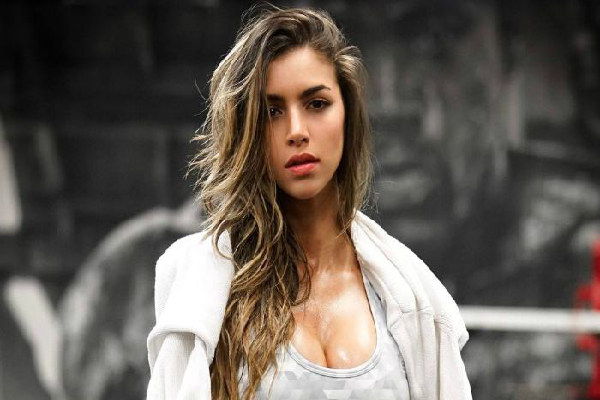

In [0]:
toimg(img_array)

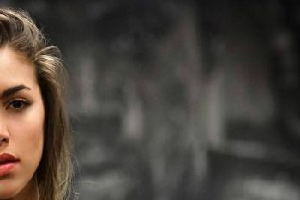

In [0]:
toimg(img_array[:,:200,300:])

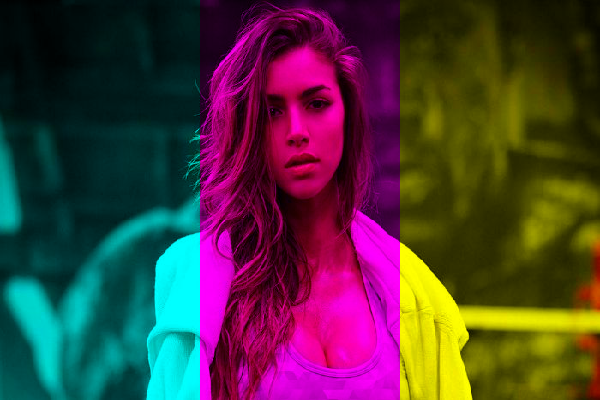

In [0]:
img_taint = img_array.clone()
img_taint[:1,:,:200]*=0
img_taint[1:2,:,200:400]*=0
img_taint[2:,:,400:]*=0
toimg(img_taint)

## Try recovering image from noise

#### Parameter

"Parameter" is like the brain tissue of AI, it's the part of model that we can improve by iteration

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
start

Parameter containing:
tensor([[[1.6063e-01, 8.6350e-01, 1.8658e-01,  ..., 5.1797e-01,
          4.0019e-01, 5.0033e-01],
         [7.1622e-01, 6.3294e-01, 9.6713e-01,  ..., 2.1957e-01,
          9.4654e-02, 3.6442e-01],
         [5.1749e-01, 1.3923e-01, 4.8127e-01,  ..., 3.0830e-01,
          9.2936e-01, 4.5396e-01],
         ...,
         [5.3962e-01, 6.7403e-01, 4.0218e-01,  ..., 2.6399e-01,
          5.4427e-01, 3.2584e-01],
         [1.5994e-01, 9.0463e-01, 5.2583e-02,  ..., 2.5110e-01,
          7.3830e-01, 8.9693e-01],
         [1.8615e-01, 1.1917e-01, 3.1394e-01,  ..., 9.5800e-01,
          7.3662e-01, 6.2337e-01]],

        [[9.5373e-01, 2.3133e-01, 6.2040e-01,  ..., 4.5753e-04,
          6.7433e-01, 6.7599e-01],
         [8.4512e-01, 5.2400e-01, 6.8129e-01,  ..., 3.8088e-01,
          8.0076e-01, 9.1112e-01],
         [2.8532e-02, 1.4898e-01, 6.6462e-01,  ..., 3.1017e-01,
          2.7868e-01, 3.5291e-01],
         ...,
         [2.9680e-01, 4.6915e-01, 1.8639e-01,  ..., 9.980

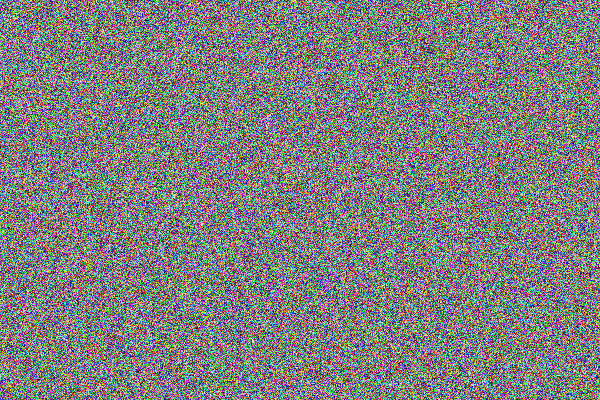

In [0]:
toimg(start)

In [0]:
start.min(), start.max()

(tensor(3.5763e-07, grad_fn=<MinBackward1>),
 tensor(1.0000, grad_fn=<MaxBackward1>))

### Mean Squared Error
The l2 distance between noise and ground truth image, pixel-wisely

In [0]:
loss = torch.pow((start - img_array),2).mean()

In [0]:
loss

tensor(0.1796, grad_fn=<MeanBackward1>)

Calculate the gradients: 

In [0]:
loss.backward()

In [0]:
start.grad

tensor([[[ 4.1352e-07,  2.3659e-06,  4.8561e-07,  ...,  1.2972e-06,
           9.7002e-07,  1.2482e-06],
         [ 1.9459e-06,  1.7146e-06,  2.6429e-06,  ...,  4.6830e-07,
           1.3221e-07,  8.8155e-07],
         [ 1.3939e-06,  3.4317e-07,  1.2933e-06,  ...,  7.3655e-07,
           2.4508e-06,  1.1303e-06],
         ...,
         [ 3.3338e-07,  7.2852e-07,  1.6940e-08,  ..., -2.4709e-07,
           5.3148e-07, -7.5287e-08],
         [-7.6487e-07,  1.3364e-06, -9.8683e-07,  ..., -1.6306e-07,
           1.2012e-06,  1.6527e-06],
         [-6.9206e-07, -8.4545e-07, -2.6085e-07,  ...,  1.8659e-06,
           1.2618e-06,  9.7994e-07]],

        [[ 2.6166e-06,  6.0991e-07,  1.6907e-06,  ..., -1.4034e-07,
           1.7315e-06,  1.7361e-06],
         [ 2.3040e-06,  1.4120e-06,  1.8489e-06,  ...,  9.1639e-07,
           2.0936e-06,  2.4002e-06],
         [ 3.5683e-08,  3.7027e-07,  1.8026e-06,  ...,  7.4175e-07,
           6.4338e-07,  8.4960e-07],
         ...,
         [-3.5201e-07,  1

### Stochastic Gradient Descent (SGD)



First, we define what will happend during an iteration, we call it an update step

In [0]:
alpha = 1e2
def updating_step(number,start):
    """
    Run this repeatatively, and your parameters will improve
    """
    # measure the distance between "our guess" and the "ground truth"
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean() 
    
    # print out distance
    print(number,"loss:",loss.item())
    
    # calcualte the gradient
    loss.backward()
    
    # move the parameter a step closer to ground truth, alpha(or learning rate: to control the step size)
    start.data -= start.grad.data * alpha
    return start

0 loss: 0.14667221903800964
1 loss: 0.14666801691055298
2 loss: 0.14665961265563965
3 loss: 0.14664684236049652
4 loss: 0.14662986993789673
5 loss: 0.14660871028900146
6 loss: 0.14658322930335999
7 loss: 0.14655357599258423
8 loss: 0.14651979506015778
9 loss: 0.1464817076921463
10 loss: 0.146439328789711
11 loss: 0.146392822265625
12 loss: 0.14634200930595398
13 loss: 0.14628715813159943
14 loss: 0.14622783660888672
15 loss: 0.14616435766220093
16 loss: 0.14609669148921967
17 loss: 0.14602485299110413
18 loss: 0.14594876766204834
19 loss: 0.1458684504032135
20 loss: 0.1457839161157608
21 loss: 0.14569516479969025
22 loss: 0.1456023007631302
23 loss: 0.1455051451921463
24 loss: 0.14540386199951172
25 loss: 0.14529822766780853
26 loss: 0.1451885998249054
27 loss: 0.1450747549533844
28 loss: 0.14495672285556793
29 loss: 0.1448344886302948
30 loss: 0.14470811188220978
31 loss: 0.14457733929157257
32 loss: 0.14444264769554138
33 loss: 0.1443038135766983
34 loss: 0.144160658121109
35 loss: 0

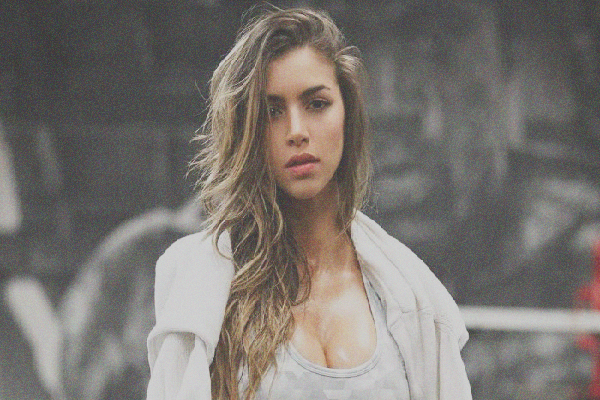

In [0]:
# restart the parameters from pure noise
start = nn.Parameter(torch.rand(3,400,600)) 

for _ in range(300):
    start=updating_step(_,start)
    
toimg(torch.sigmoid(start))

### Adagrad
[paper on Adagrad](http://jmlr.org/papers/v12/duchi11a.html)

In [0]:
learning_rate = 1e-1


class adagrad(object):
    def __init__(self,learning_rate,param):
        super().__init__()
        self.learning_rate = learning_rate
        self.param = param
        self.init_shape()
        self.step_state = 0
        
    def init_shape(self):
        self.grad_sum_sq = torch.zeros_like(self.param)
        
    def step(self):
        self.step_state+=1
        grad = self.param.grad.data
        self.grad_sum_sq += grad*grad
    
        std = self.grad_sum_sq.sqrt()+1e-10 # standar deviation
    
        self.param.data -= grad * (self.learning_rate / std)

0 loss: 0.1466466635465622
1 loss: 0.13110004365444183
2 loss: 0.1179642602801323
3 loss: 0.1068544089794159
4 loss: 0.09729891270399094
5 loss: 0.08896821737289429
6 loss: 0.08162643015384674
7 loss: 0.07509956508874893
8 loss: 0.06925908476114273
9 loss: 0.06400410085916519
10 loss: 0.05925441533327103
11 loss: 0.054945286363363266
12 loss: 0.051022835075855255
13 loss: 0.047442901879549026
14 loss: 0.04416821151971817
15 loss: 0.04116618260741234
16 loss: 0.03840884193778038
17 loss: 0.03587232902646065
18 loss: 0.0335356630384922
19 loss: 0.031380269676446915
20 loss: 0.029389865696430206
21 loss: 0.02754976600408554
22 loss: 0.025846926495432854
23 loss: 0.024269957095384598
24 loss: 0.022808615118265152
25 loss: 0.02145337127149105
26 loss: 0.020195573568344116
27 loss: 0.019027626141905785
28 loss: 0.0179426446557045
29 loss: 0.016934219747781754
30 loss: 0.015996593981981277
31 loss: 0.015124556608498096
32 loss: 0.01431318186223507
33 loss: 0.013557999394834042
34 loss: 0.0128

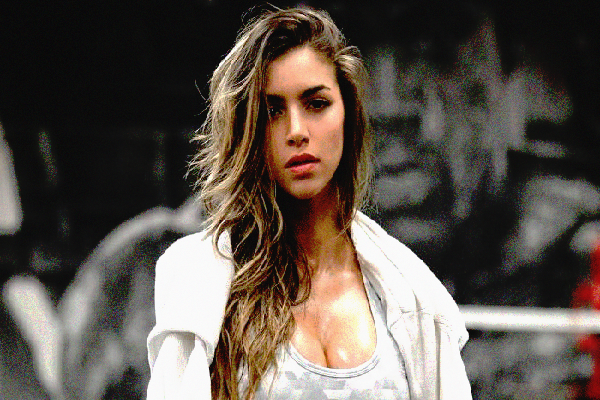

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
opt = adagrad(learning_rate = learning_rate,
              param = start)

for _ in range(200):
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean()
    print(_,"loss:",loss.item())
    loss.backward()
    opt.step()
toimg(torch.sigmoid(start))

## Adam:  Adaptive SGD with Momentum

In [0]:
learning_rate = 1e-2
import math


class adam(object):
    def __init__(self,learning_rate,param,beta1=0.9, beta2 = 0.999):
        super().__init__()
        self.learning_rate = learning_rate
        self.param = param
        self.init_shape()
        self.beta1 = beta1 #adam +
        self.beta2 = beta2 #adam +
        self.step_state = 0
        
    def init_shape(self):
        self.grad_sum_sq = torch.zeros_like(self.param)
        self.grad_sum = torch.zeros_like(self.param) # adam +
        
    def step(self):
        self.step_state+=1
        grad = self.param.grad.data
        
        self.grad_sum = self.grad_sum*self.beta1 + (1-self.beta1)*grad # adam +
        self.grad_sum_sq = self.grad_sum_sq*self.beta2 + (1-self.beta2)*grad*grad # adam +-
        
        bias_correction1 = 1 - self.beta1 ** self.step_state
        bias_correction2 = 1 - self.beta2 ** self.step_state
        
        step_size = self.learning_rate * math.sqrt(bias_correction2) / bias_correction1
        
        std = self.grad_sum_sq.sqrt()+1e-10
    
        self.param.data -= step_size*(self.grad_sum / std)

0 loss: 0.14664267003536224
1 loss: 0.1450727880001068
2 loss: 0.14355267584323883
3 loss: 0.1420469880104065
4 loss: 0.14054282009601593
5 loss: 0.1390341818332672
6 loss: 0.13751815259456635
7 loss: 0.1359931230545044
8 loss: 0.13445858657360077
9 loss: 0.13291384279727936
10 loss: 0.13135896623134613
11 loss: 0.12979409098625183
12 loss: 0.12821967899799347
13 loss: 0.12663596868515015
14 loss: 0.12504351139068604
15 loss: 0.12344273179769516
16 loss: 0.1218346655368805
17 loss: 0.12021999061107635
18 loss: 0.11859913170337677
19 loss: 0.11697278916835785
20 loss: 0.11534205824136734
21 loss: 0.11370735615491867
22 loss: 0.11206972599029541
23 loss: 0.1104297861456871
24 loss: 0.1087883934378624
25 loss: 0.10714641213417053
26 loss: 0.105504609644413
27 loss: 0.10386371612548828
28 loss: 0.10222456604242325
29 loss: 0.10058795660734177
30 loss: 0.09895463287830353
31 loss: 0.09732548892498016
32 loss: 0.09570109844207764
33 loss: 0.09408219158649445
34 loss: 0.0924697294831276
35 lo

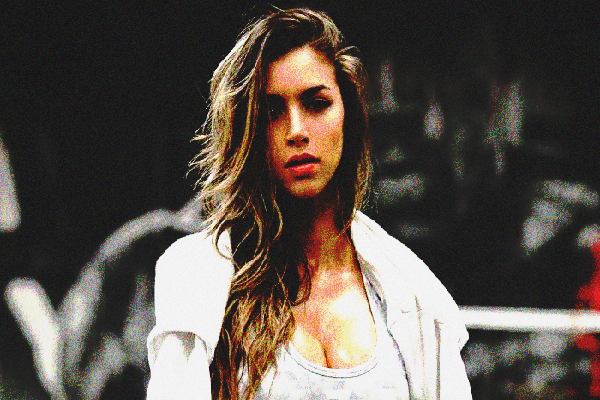

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
opt = adam(learning_rate = learning_rate,
              param = start)

for _ in range(200):
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean()
    print(_,"loss:",loss.item())
    loss.backward()
    opt.step()
toimg(torch.sigmoid(start))

# Content Reconstruction

In [0]:
from torchvision.models.vgg import vgg19
from torchvision import transforms

In [0]:
CUDA = torch.cuda.is_available()
print(CUDA)

True


In [0]:
vgg = vgg19(pretrained=True)
if CUDA: vgg.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
574673361it [00:23, 24684730.75it/s]


In [0]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [0]:
conv_layers = vgg.features[:6]
conv_layers

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [0]:
class normalize(nn.Module):
    def __init__(self,mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        super().__init__()
        self.mean = torch.tensor(mean, dtype=torch.float32)
        self.std = torch.tensor(std, dtype=torch.float32)
        
    def forward(self,tensor):
        return tensor.sub(self.mean[:, None, None]).div(self.std[:, None, None])
norm = normalize()
if CUDA: norm.mean = norm.mean.cuda();norm.std = norm.std.cuda()

In [0]:
img_tensor = img2t(img).cuda() if CUDA else img2t(img)
img_input = norm(img_tensor).unsqueeze(0)
print(img_input.size())
img_input

torch.Size([1, 3, 400, 600])


tensor([[[[-2.0665, -2.0665, -2.0665,  ..., -1.8953, -1.8953, -1.8953],
          [-2.0494, -2.0494, -2.0494,  ..., -1.8953, -1.9124, -1.9124],
          [-2.0494, -2.0494, -2.0494,  ..., -1.9295, -1.9124, -1.9124],
          ...,
          [-0.2856, -0.3198, -0.3883,  ..., -0.5767, -0.5767, -0.5767],
          [-0.2171, -0.2684, -0.3369,  ..., -0.7650, -0.7822, -0.7993],
          [-0.2171, -0.2684, -0.3369,  ..., -0.8678, -0.8849, -0.9363]],

         [[-1.9832, -1.9832, -1.9832,  ..., -1.8081, -1.8081, -1.8081],
          [-1.9657, -1.9657, -1.9657,  ..., -1.8081, -1.8256, -1.8256],
          [-1.9657, -1.9657, -1.9657,  ..., -1.8431, -1.8256, -1.8256],
          ...,
          [-0.1450, -0.1800, -0.2500,  ..., -1.8957, -1.8957, -1.8957],
          [-0.0749, -0.1275, -0.1975,  ..., -1.9132, -1.9307, -1.9132],
          [-0.0749, -0.1275, -0.1975,  ..., -1.8782, -1.8957, -1.9132]],

         [[-1.7522, -1.7522, -1.7522,  ..., -1.5779, -1.5779, -1.5779],
          [-1.7347, -1.7347, -

In [0]:
activ = conv_layers(img_input)

In [0]:
activ.size()

torch.Size([1, 128, 200, 300])

In [0]:
start = nn.Parameter(torch.rand(3,400,600,requires_grad=True,device="cuda"),)

conv_layers(norm(start).unsqueeze(0)).size()

torch.Size([1, 128, 200, 300])

In [0]:
from torch.optim import Adam

opt = Adam([start], lr=1e-2)
mse_func = nn.MSELoss()


for i in range(500):
    opt.zero_grad()
    activ = conv_layers(img_input).detach()
    activ_2 = conv_layers(norm(start).unsqueeze(0))
    
    mse = mse_func(activ_2,activ)
    
    mse.backward()
    opt.step()
    
    print(i,"mse",mse.item())
    


0 mse 146.27969360351562
1 mse 133.16334533691406
2 mse 121.11344146728516
3 mse 110.07697296142578
4 mse 100.00731658935547
5 mse 90.8507308959961
6 mse 82.54521942138672
7 mse 75.026611328125
8 mse 68.24012756347656
9 mse 62.12595748901367
10 mse 56.62641143798828
11 mse 51.68416976928711
12 mse 47.244476318359375
13 mse 43.26092529296875
14 mse 39.685020446777344
15 mse 36.47481155395508
16 mse 33.591583251953125
17 mse 30.998811721801758
18 mse 28.662851333618164
19 mse 26.556608200073242
20 mse 24.65437889099121
21 mse 22.933256149291992
22 mse 21.373140335083008
23 mse 19.954736709594727
24 mse 18.663217544555664
25 mse 17.485599517822266
26 mse 16.40870475769043
27 mse 15.42191219329834
28 mse 14.51544189453125
29 mse 13.680490493774414
30 mse 12.910473823547363
31 mse 12.198650360107422
32 mse 11.539325714111328
33 mse 10.927647590637207
34 mse 10.359227180480957
35 mse 9.830559730529785
36 mse 9.337875366210938
37 mse 8.87826919555664
38 mse 8.449418067932129
39 mse 8.04855632

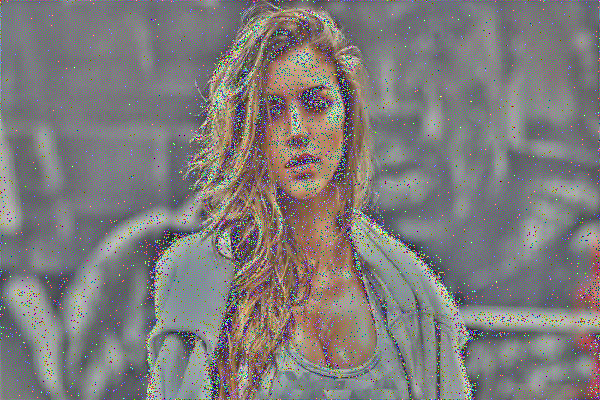

In [0]:
start = start.cpu() if CUDA else start
toimg(start.detach())

In [0]:
def tv_func(y):
    """
    total variation loss function
    return the total variation of an image
    measures how much a pixel varies to its neighbour
    """
    return torch.sum(torch.abs(y[:, :, :, :-1] - y[:, :, :, 1:]))+torch.sum(torch.abs(y[:, :, :-1, :] - y[:, :, 1:, :]))

In [0]:
start = nn.Parameter(torch.rand(3,400,600,requires_grad=True,device="cuda"),)

conv_layers(norm(start).unsqueeze(0)).size()

torch.Size([1, 128, 200, 300])

In [0]:
from torch.optim import Adam

opt = Adam([start], lr=1e-2)
mse_func = nn.MSELoss()


for i in range(500):
    opt.zero_grad()
    activ = conv_layers(img_input).detach()
    activ_2 = conv_layers(norm(start).unsqueeze(0))
    
    tv = tv_func(norm(start).unsqueeze(0))
    
    mse = mse_func(activ_2,activ) + tv * 1e-5
    
    mse.backward()
    opt.step()
    
    print(i,"mse",mse.item())

0 mse 168.05059814453125
1 mse 154.5856475830078
2 mse 142.19869995117188
3 mse 130.8369903564453
4 mse 120.44985961914062
5 mse 110.98576354980469
6 mse 102.38168334960938
7 mse 94.58057403564453
8 mse 87.5210952758789
9 mse 81.14291381835938
10 mse 75.38619995117188
11 mse 70.19308471679688
12 mse 65.50942993164062
13 mse 61.2850227355957
14 mse 57.47398376464844
15 mse 54.03675079345703
16 mse 50.93434524536133
17 mse 48.1301155090332
18 mse 45.58992004394531
19 mse 43.28491973876953
20 mse 41.18773651123047
21 mse 39.275001525878906
22 mse 37.52726745605469
23 mse 35.925331115722656
24 mse 34.45178985595703
25 mse 33.09323501586914
26 mse 31.837810516357422
27 mse 30.673450469970703
28 mse 29.59093475341797
29 mse 28.58194351196289
30 mse 27.63793182373047
31 mse 26.752382278442383
32 mse 25.92025375366211
33 mse 25.136924743652344
34 mse 24.397680282592773
35 mse 23.69854736328125
36 mse 23.036001205444336
37 mse 22.407011032104492
38 mse 21.808818817138672
39 mse 21.2390518188476

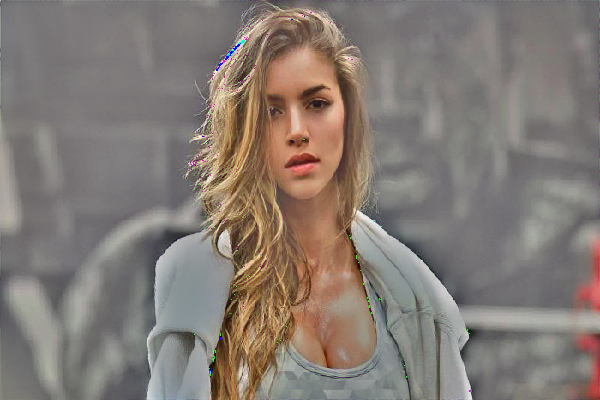

In [0]:
start = start.cpu() if CUDA else start
toimg(start.detach())

### Longer Conv Layers

In [0]:
conv_layers = vgg.features[:29]
conv_layers

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [0]:

start = nn.Parameter(torch.rand(3,400,600,requires_grad=True,device="cuda"),)

conv_layers(norm(start).unsqueeze(0)).size()

from torch.optim import Adam

opt = Adam([start], lr=1e-2)
mse_func = nn.MSELoss()


for i in range(2000):
    opt.zero_grad()
    activ = conv_layers(img_input).detach()
    activ_2 = conv_layers(norm(start).unsqueeze(0))
    
    tv = tv_func(norm(start).unsqueeze(0))
    
    mse = mse_func(activ_2,activ) + tv * 1e-4
    
    mse.backward()
    opt.step()
    
    if i%10==9: print(i,"mse",mse.item())

9 mse 171.5734100341797
19 mse 116.22494506835938
29 mse 73.28596496582031
39 mse 42.744693756103516
49 mse 24.60611343383789
59 mse 15.642536163330078
69 mse 10.972648620605469
79 mse 8.631919860839844
89 mse 7.489077568054199
99 mse 6.670992374420166
109 mse 6.175782203674316
119 mse 5.760483264923096
129 mse 5.415122032165527
139 mse 5.5183424949646
149 mse 5.085934162139893
159 mse 4.949171543121338
169 mse 4.959972381591797
179 mse 5.02711820602417
189 mse 4.8275933265686035
199 mse 4.586569309234619
209 mse 4.712216377258301
219 mse 4.649154186248779
229 mse 4.665426731109619
239 mse 4.460697174072266
249 mse 4.551962852478027
259 mse 4.483975887298584
269 mse 4.279317855834961
279 mse 4.272715091705322
289 mse 4.141763687133789
299 mse 4.403265476226807
309 mse 4.313320636749268
319 mse 4.155277729034424
329 mse 4.392320156097412
339 mse 3.973817825317383
349 mse 3.9241697788238525
359 mse 4.289556503295898
369 mse 4.005495071411133
379 mse 4.377119064331055
389 mse 4.1932373046

In [0]:
activ_2.size()

torch.Size([1, 128, 200, 300])

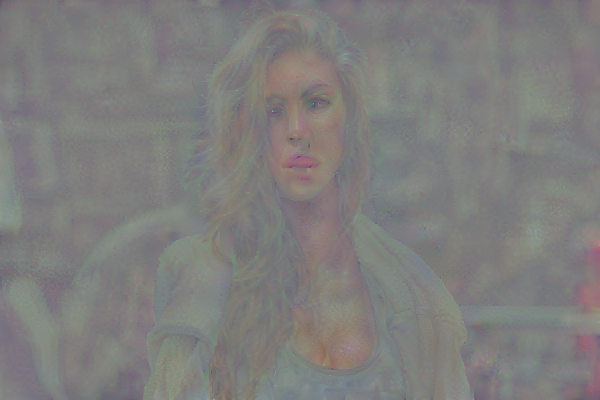

In [0]:
start = start.cpu() if CUDA else start
toimg(start.detach())